In [62]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [146]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
v0 = 20.0     # Initial starting value in velocity range
theta0 = 0.0 # Initial starting value in angle of trajectory range
x0 = 0.0     # horizotal position is arbitrary
y0 = 5.0     # initial altitude

In [147]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

In [148]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [149]:
T = 100                          # final time
dt = 0.01                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt)

In [150]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

In [151]:
# get the index of element of y where altitude becomes negative
idx_negative = numpy.where(y<0.0)[0]
if len(idx_negative)==0:
    idx_ground = N-1
    print ('Euler integration has not touched ground yet!')
else:
    idx_ground = idx_negative[0]

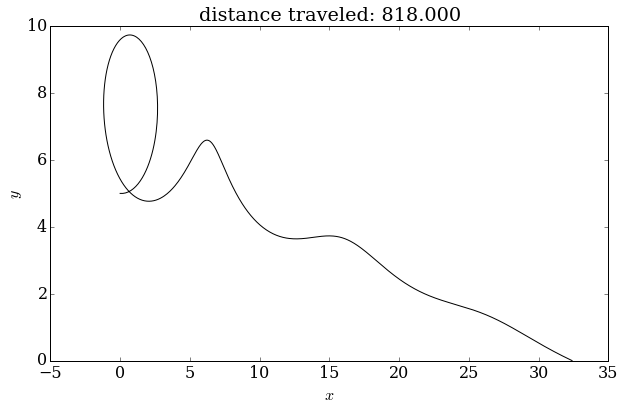

In [152]:
# plot the glider path
pyplot.figure(figsize=(10,6))
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x[:idx_ground], y[:idx_ground], 'k-')
pyplot.title('distance traveled: {:.3f}'.format(idx_ground))